### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [18]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0-rc1


#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Change train and test labels into one-hot vectors

In [0]:
train_labels_encoded=tf.keras.utils.to_categorical(train_labels)
test_labels_encoded=tf.keras.utils.to_categorical(test_labels)

In [23]:
test_labels_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#### Build the Graph

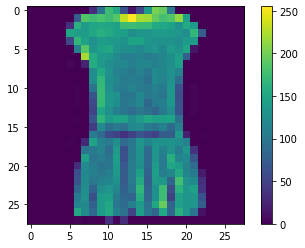

In [4]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

#### Initialize model, reshape & normalize data

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# normalize to range 0-1
train_images_norm = train_images / 255.0
test_images_norm = test_images/ 255.0
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())






#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:


#Add Dense Layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(tf.keras.layers.Dropout(0.25))

#Add 2nd hidden layer
model.add(Dense(100, activation='relu'))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#train the model with loss as 'caregorical_crossentropy' and 'adam' Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
activation (Activation)      (None, 200)               0         
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [36]:
mckpt = tf.keras.callbacks.ModelCheckpoint('./mnist_v1.h5', 
                                           monitor='val_acc', save_best_only=True)
model.fit(train_images,train_labels_encoded,          
          validation_data=(train_images,train_labels_encoded),
          epochs=5,
          batch_size=32, callbacks=[mckpt])

Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 168us/sample - loss: 0.5145 - accuracy: 0.8148 - val_loss: 0.3760 - val_accuracy: 0.8620
Epoch 2/5
60000/60000 [==============================] - 10s 166us/sample - loss: 0.4017 - accuracy: 0.8547 - val_loss: 0.3274 - val_accuracy: 0.8803
Epoch 3/5
60000/60000 [==============================] - 10s 166us/sample - loss: 0.3677 - accuracy: 0.8654 - val_loss: 0.2975 - val_accuracy: 0.8885
Epoch 4/5
60000/60000 [==============================] - 10s 167us/sample - loss: 0.3457 - accuracy: 0.8716 - val_loss: 0.2745 - val_accuracy: 0.8958
Epoch 5/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.3267 - accuracy: 0.8795 - val_loss: 0.2689 - val_accuracy: 0.9016


The final validation accuracy for this model is 90.16 %